# 第7章 確率ベクトルの変換

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy.random import *

In [103]:
def SampleMean(Π):
    N = len(Π)
    if N == 0:
        return False #計算不可能
    else:
        return sum(Π)/len(Π)
    
def SampleVariance(Π):
    m=SampleMean(Π)  #標本平均
    return SampleMean( (Π-m*np.ones_like(Π))**2 )

def Cov(X,Y):
    mx = SampleMean(X)
    my = SampleMean(Y)
    return SampleMean(X*Y)-mx*my

In [104]:
def _gauss(x,m,v):
    return 1.0/np.sqrt(2*np.pi*v) * np.exp(-(x-m)**2/(2*v))
    
gauss = np.vectorize(_gauss,excluded=['m','v'])

## 7.1 確率変数の加法とスカラ倍

## 7.1.1 加法 $Z = X + Y$ の分布

### 例題7.1

In [105]:
import sympy as sym
sym.init_printing(use_latex='mathjax') #整形した数式の表示

def Example_7_1(np_zz):
    x, y, z = sym.symbols('z y z')
    m, v = sym.symbols('m v')
    a, b = sym.symbols('a b')
    # pX(x) ガウス，pXzy = pX(z-y)
    pX = 1/sym.sqrt(2*sym.pi*v) * sym.exp(-(x-m)**2/(2*v))
    gauss_erf = sym.simplify( sym.integrate(pX,(x, 0, sym.Symbol('A'))) )
    pXzy = pX.subs([(x,z-y)])
    #print(pXzy)
    pZ = sym.simplify(sym.integrate(pXzy/(b-a), (y, a, b)))
    list_pZ = [ pZ.subs([(z,_z),(m,0),(v,1),(a,-2),(b,5)]) for _z in np_zz ]
    return pZ, np.array(list_pZ), gauss_erf

np_zz = np.linspace(-6,10,100)
sym_pZ, np_pZ, gauss_erf = Example_7_1(np_zz)
sym_pZ

   ⎛√2⋅(a + m - z)⎞      ⎛√2⋅(b + m - z)⎞
erf⎜──────────────⎟ - erf⎜──────────────⎟
   ⎝     2⋅√v     ⎠      ⎝     2⋅√v     ⎠
─────────────────────────────────────────
                2⋅(a - b)                

解答例の計算に使うガウス分布の累積積分 ※erf$(-x)$=$-$erf$(x)$に注意！

In [106]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            gauss_erf

   ⎛√2⋅m⎞      ⎛√2⋅(A - m)⎞
erf⎜────⎟   erf⎜──────────⎟
   ⎝2⋅√v⎠      ⎝   2⋅√v   ⎠
───────── + ───────────────
    2              2       

### 図7.1

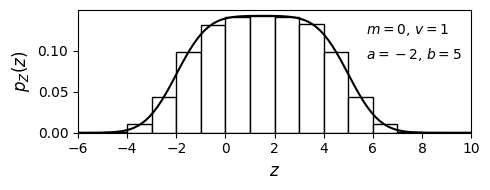

In [107]:
X = randn(100000) #平均0分散1の正規乱数
Y = uniform(-2, 5, 100000) #区間[-2,5]の一様乱数
Z = X + Y

plt.figure(figsize=(5,2))
plt.hist(Z, range=[-6,10], bins=16, density=True, color='w', edgecolor='k')
plt.plot(np_zz,np_pZ, 'k-') #例題7.1で導出した式
plt.xlim([-6,10])
plt.xticks( np.arange(-6, 11, 2) )
plt.xlabel('$z$', fontsize=12)
plt.ylabel('$p_Z(z)$', fontsize=12)
plt.text(5.7, 0.12,'$m=0$, $v=1$')
plt.text(5.7, 0.09,'$a=-2$, $b=5$')
plt.tight_layout()
plt.savefig('figs/Ch07-gauss_uniform.eps', bbox_inches='tight')

## 7.2 ガウス確率変数の加法とスカラ倍

## 7.2.1 加法 $Z = X + Y$ の分布

In [108]:
X = randn(100000) + 5*np.ones(100000)
Y = X + randn(100000)

In [109]:
mx = SampleMean(X) # Xの期待値
my = SampleMean(Y) # Yの期待値
vx = SampleVariance(X) # Xの分散
vy = SampleVariance(Y) # Yの分散
Cxy = Cov(X,Y) # X,Yの共分散
mx, my, vx, vy, Cxy

(4.9996495155791365, 4.997064743251399, 0.9954464876420261, 2.005568022067418,
 0.9993366882688584)

In [110]:
mz = mx + my
vz = vx + 2*Cxy + vy

In [111]:
Z = X + Y

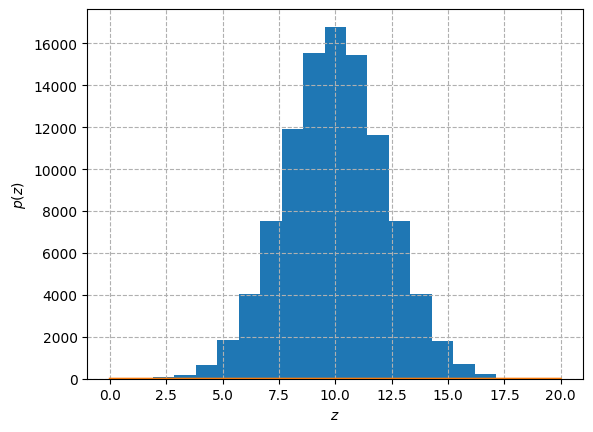

In [112]:
# plt.hist(Z, range=[0,20], bins=21, normed=True)
plt.hist(Z, range=[0,20], bins=21)
xx = np.linspace(0,20,100)
plt.plot(xx, gauss(xx,mz,vz),'-')
plt.xlabel('$z$')
plt.ylabel('$p(z)$')
plt.grid(linestyle='--')

## 7.2.2 スカラ倍 $Z = a X$ の分布

In [113]:
X = randn(100000) + 5*np.ones_like(X)

In [114]:
mx = SampleMean(X) # Xの期待値
vx = SampleVariance(X) # Xの分散
mx, vx

(4.9983030150776, 1.006656275183026)

In [115]:
a = 0.5
mz = a*mx
vz = (a**2)*vx

In [116]:
Z = a*X

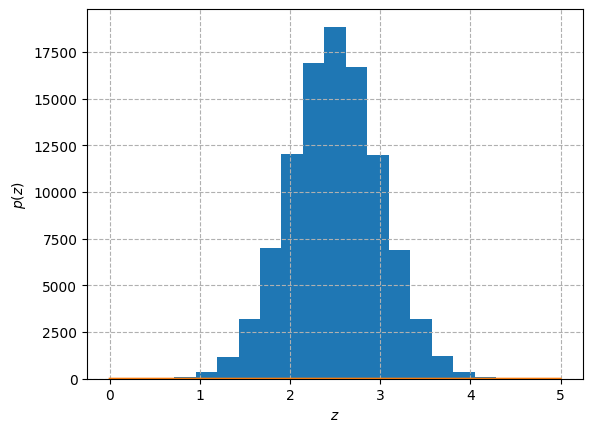

In [117]:
# plt.hist(Z, range=[0,5], bins=21, normed=True)
plt.hist(Z, range=[0,5], bins=21)
xx = np.linspace(0,5,100)
plt.plot(xx, gauss(xx,mz,vz),'-')
plt.xlabel('$z$')
plt.ylabel('$p(z)$')
plt.grid(linestyle='--')

## 7.2.3 線形結合 $Z = a_1 X_1 + a_2 X_2$ の分布

In [118]:
X1 = randn(100000) + 5*np.ones_like(X)
X2 = X1 + randn(100000)

In [119]:
m1 = SampleMean(X1) # X1の期待値
m2 = SampleMean(X2) # X2の期待値
v1 = SampleVariance(X1) # X1の分散
v2 = SampleVariance(X2) # X2の分散
C12 = Cov(X1,X2) # X,Yの共分散
m1, m2, v1, v2, C12

(5.006423735451398, 5.008415729927208, 1.0066299676558184, 2.0139556089079025,
 1.0078767400112518)

In [120]:
a1 = 0.5
a2 = 2
mz = a1*mx + a2*my
vz = (a1**2)*vx + 2*a1*a2*C12 + (a2**2)*vy

In [121]:
Z = a1*X1 + a2*X2

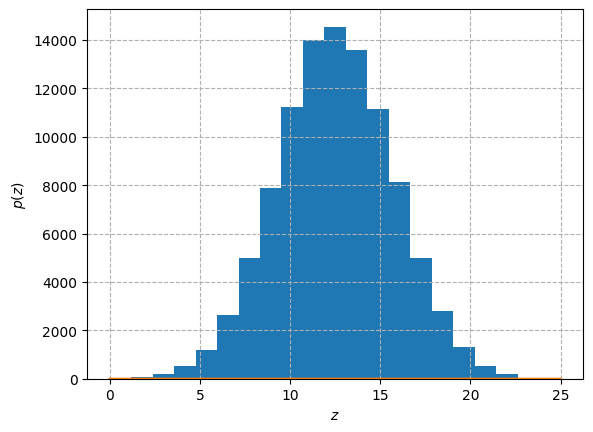

In [122]:
# plt.hist(Z, range=[0,25], bins=21, normed=True)
plt.hist(Z, range=[0,25], bins=21)
xx = np.linspace(0,25,100)
plt.plot(xx, gauss(xx,mz,vz),'-')
plt.xlabel('$z$')
plt.ylabel('$p(z)$')
plt.grid(linestyle='--')

## 7.3 共分散行列と多変数ガウス分布

## 7.3.1 共分散行列

In [123]:
def CovMatrix(XX,YY):
    dim = len(XX[0])
    cov = np.zeros([dim,dim])
    for i in range(dim):
        cov[i,i] = Cov(XX[:,i], YY[:,i])
        for j in range(i):
            cov[i,j] = Cov(XX[:,i], YY[:,j])
            cov[j,i] = cov[i,j]
    return cov

### 数値例：3次元ガウス分布のランダムデータ

In [124]:
means = [1,2,3] #期待値ベクトル
covmat = [[1,0.5,0.2],[0.5,2,1],[0.2,1,3]] #分散共分散行列
data_for_test = np.random.multivariate_normal(means, covmat, 100000)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(data_for_test[:,0],data_for_test[:,1],data_for_test[:,2],".",markersize=0.5)

<Figure size 640x480 with 0 Axes>

#### データの分散共分散行列

標本数が有限なので，ぴったりではないですが，covmat の成分と一致します．

In [125]:
CovMatrix(data_for_test,data_for_test)

array([[0.99884382, 0.49595551, 0.20038569],
       [0.49595551, 2.0011163 , 0.99670858],
       [0.20038569, 0.99670858, 2.97302812]])

## 7.3.2 多変数ガウス分布

$n$次元の式を使って，2次元のガウス分布を記述してみる．

In [126]:
def _Gauss2dv(_x1, _x2, _mm, _covmat):
    xx = np.array([_x1,_x2])
    mm = np.array(_mm)
    covmat = np.array(_covmat)
    n = len(mm)
    det = np.linalg.det(covmat)
    inv = np.linalg.pinv(covmat)
    xxm = xx - mm
    a = 1/( (np.sqrt(2*np.pi)**n)*np.sqrt(det) )
#    b = -0.5*np.dot(xxm,np.dot(inv,xxm))
    b = -0.5*xxm.dot(inv.dot(xxm))
    return a*np.exp(b)

Gauss2dv = np.vectorize(_Gauss2dv, excluded=[2,3])

In [127]:
xx = np.linspace(-2,4,50)
yy = np.linspace(-5,5,50)

In [128]:
Means = np.array([1,0])
CovMat = np.array([[1,0.8],[0.8,2]])

XX,YY = np.meshgrid(xx,yy)
ZZ = Gauss2dv(XX, YY, Means, CovMat)

In [129]:
from matplotlib import cm

def density_plot(Xgrid, Ygrid, Zgrid, zlabel='zlabel', cmap=cm.coolwarm):
    fig = plt.figure(figsize=(10,4))
    ax2d = fig.add_subplot(121)
    ax3d = fig.add_subplot(122, projection='3d')
    cont = ax2d.contourf(Xgrid, Ygrid, Zgrid, cmap=cmap)
    ax2d.set_xlabel('$x$')
    ax2d.set_ylabel('$y$')
    surf = ax3d.plot_surface(Xgrid, Ygrid, Zgrid, cmap=cmap, linewidth=0)
    ax3d.set_xlabel('$x$')
    ax3d.set_ylabel('$y$')
    ax3d.set_zlabel(zlabel)
    fig.colorbar(cont, ax=ax2d, label=zlabel)
    plt.tight_layout(pad=1)

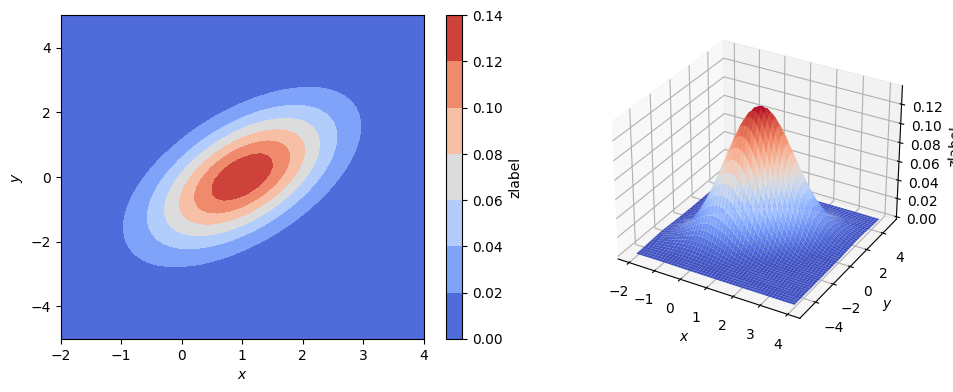

In [130]:
density_plot(XX, YY, ZZ)

## 7.4 ガウス確率ベクトルの線形変換

## 7.4.2  2変数ガウス分布の例（標本バージョン）

上と同じ 2変数ガウス分布で生成した標本点

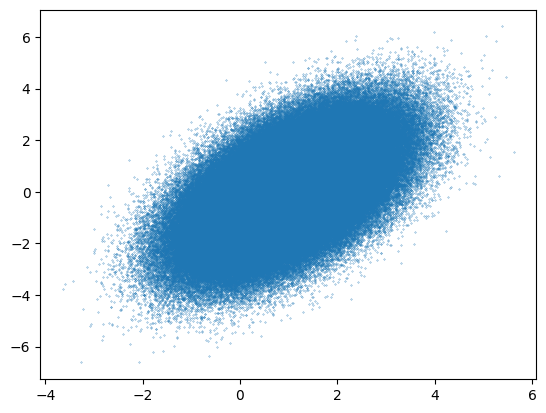

In [131]:
X_data = np.random.multivariate_normal(Means, CovMat, 500000)
plt.plot(X_data[:,0],X_data[:,1],".",markersize=0.5)

標本の共分散を計算すると，所与の共分散 0.8 (CovMatの非対角要素)に近い値となる．

In [132]:
Cov(X_data[:,0],X_data[:,1])

0.800541019984148

In [133]:
CovMat[0,1]

0.8

対角化の変換行列 $S$

In [134]:
l,S = np.linalg.eig(CovMat)
l,S

(array([0.55660189, 2.44339811]),
 array([[-0.87464248, -0.48476853],
        [ 0.48476853, -0.87464248]]))

この $S$ で実際に $S^T$(CovMat)$S$ は対角化される．

In [135]:
(S.T).dot(CovMat.dot(S))

array([[ 5.56601887e-01, -2.22044605e-16],
       [-1.66533454e-16,  2.44339811e+00]])

$S$ で変換した標本点 $Y = S^T X$

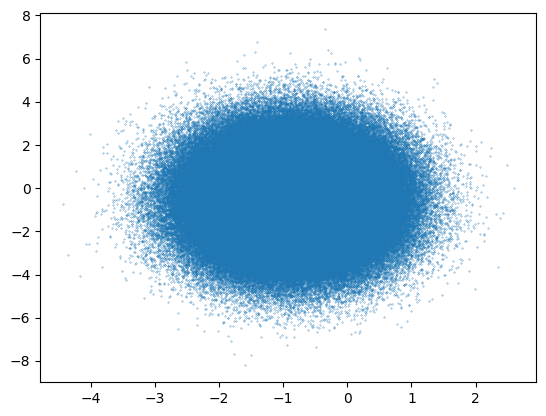

In [136]:
Y_data = ( (S.T).dot(X_data.T) ).T
plt.plot(Y_data[:,0],Y_data[:,1],".",markersize=0.5)

分布がまっすぐになった．この標本の共分散を計算すると，無相関を意味する 0 に近い値となる．

In [137]:
Cov(Y_data[:,0], Y_data[:,1])

0.0007009959856448811

## 7.4.2  2変数ガウス分布の例（理論計算バージョン）

In [138]:
def density_plot2(Xgrid, Ygrid, Zgrid, zmax=0.31, zstep=0.1, cmap="binary", labels=['$x_1$','$x_2$','$p(x_1,x_2)$']):
    fig = plt.figure(figsize=(4,3))
    ax3d = fig.add_subplot(111, projection='3d')
    ax3d.view_init(elev=17, azim=-115)
    surf = ax3d.plot_surface(Xgrid, Ygrid, Zgrid, cmap=cmap, linewidth=0)
    zoff = -0.7*zmax
    ax3d.set_zticks(np.arange(0,zmax,zstep))
    ax3d.set_zlim([zoff,zmax])
    ax3d.contourf(Xgrid, Ygrid, Zgrid, cmap=cmap, offset=zoff)
    ax3d.set_xlabel(labels[0],fontsize=12)
    ax3d.set_ylabel(labels[1],fontsize=12)
    ax3d.zaxis.set_rotate_label(False)
    ax3d.set_zlabel(labels[2],fontsize=12,rotation=90)
    plt.tight_layout(pad=1)

### 元の2変数ガウス分布

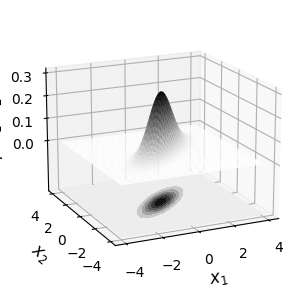

In [139]:
xx = np.linspace(-4,4,100)
yy = np.linspace(-4,4,100)
XX,YY = np.meshgrid(xx,yy)

Means = np.array([0,0])
CovMat_org = np.array([[1,0.8],[0.8,1]])

ZZ_org = Gauss2dv(XX, YY, Means, CovMat_org)
density_plot2(XX, YY, ZZ_org)

#### 式(7.31)

In [140]:
eig_values, Smat=np.linalg.eig(CovMat_org)
print('固有値 =\n', eig_values)
print('行列 S =\n', Smat)

固有値 =
 [1.8 0.2]
行列 S =
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


テキストの手計算とは違う並べ順で，固有値が返ってきました．その結果，行列Sの列が入れ替わってます．
固有値のソートが降順になる仕様なんですかね．

試しに，この並べ順のまま進めてみましょう．

#### 式(7.33)

In [141]:
CovMat_new = Smat.T.dot(CovMat_org).dot(Smat)
print(CovMat_new)

[[ 1.80000000e+00 -1.11022302e-16]
 [-1.38777878e-16  2.00000000e-01]]


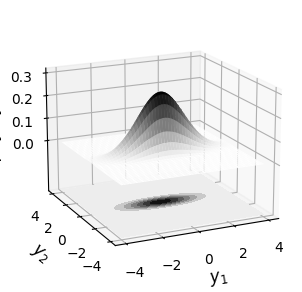

In [142]:
ZZ_new = Gauss2dv(XX, YY, Means, CovMat_new)
density_plot2(XX, YY, ZZ_new, labels=['$y_1$','$y_2$','$p\'(y_1,y_2)$'])

当然ながら，テキストの手計算による共分散行列とは，90度違う結果になります．別に間違ってはいません．対角化後の$y_1$と$y_2$の立場を入れ替えれば同じ結果です．

### テキストに合せた修正

間違いではありませんが，一応，手計算に合せた結果も出しときましょう．列を入れ替えるには・・・

In [143]:
Smat2 = Smat[:,[1,0]]
print(Smat2)

[[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]


はい，これでテキストの手計算と同じ並べ順になりました．

#### 式(7.33)

これで，対角化後の共分散行列も揃いまして，

In [144]:
CovMat_new2 = Smat2.T.dot(CovMat_org).dot(Smat2)
print(CovMat_new2)

[[ 2.00000000e-01 -1.38777878e-16]
 [-1.11022302e-16  1.80000000e+00]]


#### 図7.1 (b)

以下がテキストにあるグラフになります．

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


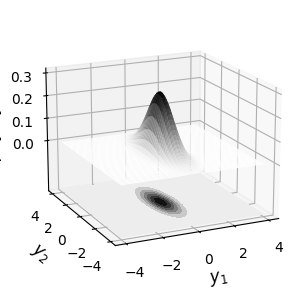

In [145]:
ZZ_new2 = Gauss2dv(XX, YY, Means, CovMat_new2)
density_plot2(XX, YY, ZZ_new2, labels=['$y_1$','$y_2$','$p\'(y_1,y_2)$'])
plt.savefig('figs/Ch07_gauss_2d_rot.eps', bbox_inches='tight')

### 答えが2種類あっていいの？

+ いーんです．
+ 固有ベクトルを並べて行列Sを作るときに，その並べ順については，計算する人の裁量で決めます．
+ ただし，その結果，変換後の独立変数$y_1$, $y_2$の立場が入れ替わります．